In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import interpolate

In [2]:
hmap = pd.read_csv('../data/highway_map.csv', names=['x', 'y', 's', 'dx', 'dy'], sep=' ')
hmap.head()

,x,y,s,dx,dy
0,784.6001,1135.571,0.000000,-0.023598,-0.999722
1,815.2679,1134.930,30.674479,-0.010995,-0.999940
2,844.6398,1134.911,60.046371,-0.002048,-0.999998
3,875.0436,1134.808,90.450415,-0.001848,-0.999998
4,905.2830,1134.799,120.689735,0.004131,-0.999992


In [3]:
idx = np.arange(len(hmap))

s = 0  # smoothing factor; s=0 hits all knots exactly
k = 3  # order of spline; should probably be odd

spline_x = interpolate.UnivariateSpline(hmap['s'], hmap['x'], k=k, s=s)
spline_y = interpolate.UnivariateSpline(hmap['s'], hmap['y'], k=k, s=s)

spline_dx = spline_x.derivative(1)
spline_dy = spline_y.derivative(1)

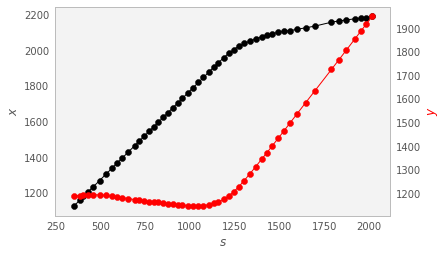

In [4]:
fig, ax = plt.subplots()
bx = ax.twinx()

idx_plot = np.arange(12, 64)
ax.scatter(hmap['s'][idx_plot], hmap['x'][idx_plot], color='black')
bx.scatter(hmap['s'][idx_plot], hmap['y'][idx_plot], color='red')

s_plot_fine = np.linspace(hmap['s'][idx_plot[0]], hmap['s'][idx_plot[-1]], 200)
ax.plot(s_plot_fine, spline_x(s_plot_fine), color='black')
bx.plot(s_plot_fine, spline_y(s_plot_fine), color='red')

ax.set_xlabel('$s$')
ax.set_ylabel('$x$')
bx.set_ylabel('$y$', color='red')

for a in ax, bx:
    a.grid(False)

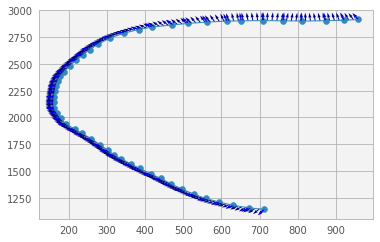

In [5]:
fig, ax = plt.subplots()

imin = 130
d = 50
idx_plot = np.arange(imin, imin + d)
ax.scatter(hmap['x'][idx_plot], hmap['y'][idx_plot])

s_plot_fine = np.linspace(hmap['s'][idx_plot[0]], hmap['s'][idx_plot[-1]], 200)
ax.plot(spline_x(s_plot_fine), spline_y(s_plot_fine))

dx = spline_dx(s_plot_fine)
dy = spline_dy(s_plot_fine)

theta = np.arctan2(dy, dx)
theta_antinormal = theta - np.pi / 2

dx_antinormal = np.cos(theta_antinormal)
dy_antinormal = np.sin(theta_antinormal)

ax.quiver(
    spline_x(s_plot_fine), spline_y(s_plot_fine),
    dx_antinormal, dy_antinormal,
    angles='xy', color='navy', width=.003, scale=40
)

ax.quiver(
    hmap['x'][idx_plot], hmap['y'][idx_plot],
    hmap['dx'][idx_plot], hmap['dy'][idx_plot],
    angles='xy', color='blue', width=.003, scale=40
)

# xl = ax.get_xlim()
# yl = ax.get_ylim()
# dx = xl[1] - xl[0]
# dy = yl[1] - yl[0]
# d = max(dx, dy)
# ax.set_xlim(xl[0], xl[0] + d)
# ax.set_ylim(yl[0], yl[0] + d)


In [6]:
hmap.head()

,x,y,s,dx,dy
0,784.6001,1135.571,0.000000,-0.023598,-0.999722
1,815.2679,1134.930,30.674479,-0.010995,-0.999940
2,844.6398,1134.911,60.046371,-0.002048,-0.999998
3,875.0436,1134.808,90.450415,-0.001848,-0.999998
4,905.2830,1134.799,120.689735,0.004131,-0.999992


In [7]:
df = pd.DataFrame()
ndata = len(hmap)
s_fine = np.arange(0.0, np.array(hmap['s'])[-1], 1.0)
df['x'] = spline_x(s_fine)
df['y'] = spline_y(s_fine)
df['s'] = s_fine

dx = spline_dx(s_fine)
dy = spline_dy(s_fine)

theta = np.arctan2(dy, dx)
theta_antinormal = theta - np.pi / 2

dx_antinormal = np.cos(theta_antinormal)
dy_antinormal = np.sin(theta_antinormal)

df['dx'] = dx_antinormal
df['dy'] = dy_antinormal

df.head(60)

,x,y,s,dx,dy
0,784.600100,1135.571000,0.0,-0.042454,-0.999098
1,785.599725,1135.529408,1.0,-0.040695,-0.999172
2,786.599361,1135.489561,2.0,-0.038971,-0.999240
3,787.599010,1135.451422,3.0,-0.037284,-0.999305
4,788.598671,1135.414954,4.0,-0.035634,-0.999365
5,789.598344,1135.380121,5.0,-0.034019,-0.999421
6,790.598028,1135.346886,6.0,-0.032441,-0.999474
7,791.597723,1135.315213,7.0,-0.030899,-0.999523
8,792.597430,1135.285065,8.0,-0.029394,-0.999568
9,793.597148,1135.256405,9.0,-0.027925,-0.999610


In [8]:
df.to_csv('../data/highway_map_fine.csv', index=False, header=False, sep=' ')
!head ../data/highway_map_fine.csv
!echo
!head ../data/highway_map.csv

784.6001000000001 1135.571 0.0 -0.042454217764530434 -0.999098413267683
785.599724527305 1135.5294081912348 1.0 -0.04069470963563248 -0.9991716272030905
786.5993613242659 1135.489560987607 2.0 -0.03897140049835047 -0.9992403264196242
787.5990102195499 1135.451421791411 3.0 -0.037284326050119145 -0.9993046977929146
788.5986710418246 1135.4149540049402 4.0 -0.03563351966341839 -0.999364924477739
789.5983436197567 1135.3801210304898 5.0 -0.0340190124835796 -0.9994211858819294
790.5980277820137 1135.3468862703537 6.0 -0.03244083352483831 -0.9994736576419679
791.5977233572632 1135.3152131268266 7.0 -0.030899009764594438 -0.9995225116001978
792.5974301741717 1135.2850650022017 8.0 -0.02939356623583834 -0.9995679157835846
793.5971480614073 1135.2564052987746 9.0 -0.02792452611771496 -0.9996100343839597

784.6001 1135.571 0 -0.02359831 -0.9997216
815.2679 1134.93 30.6744785308838 -0.01099479 -0.9999396
844.6398 1134.911 60.0463714599609 -0.002048373 -0.9999979
875.0436 1134.808 90.450414657592